In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd


In [12]:
df = pd.read_csv(r"D:\advanced_training_AIML\Advanced-Training-AIML-Python-\Day-18\customer 1-EDa-prj1 1.csv")

In [13]:
df.head()

,customer_id,age,income,purchase_amount,gender,region,total_purchases,preferred_product_category,customer_loyalty_score,signup_date,last_purchase_date
0,1,56.0,67700.0,1019.145669,Female,South,31.0,Toys,12.501082,2022-05-01,2022-02-27
1,2,69.0,50200.0,252.214693,Male,North,27.0,Toys,14.402036,2022-03-14,2022-07-03
2,3,46.0,84000.0,354.742321,Male,East,25.0,Clothing,89.085761,2022-07-17,2022-04-13
3,4,32.0,42700.0,716.573913,Male,West,5.0,Electronics,98.800804,2022-07-09,2021-04-21
4,5,60.0,112300.0,1528.118235,Female,West,6.0,Clothing,28.893785,2021-04-21,2021-06-02


In [18]:
df = df.drop(columns=['customer_id', 'gender', 'region', 'preferred_product_category', 'signup_date', 'last_purchase_date'], errors='ignore')


In [20]:
df = df.dropna()


In [21]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)

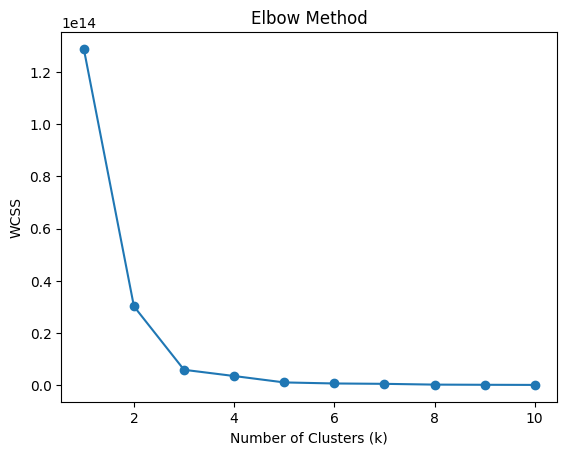

In [22]:
# Optional: plot the elbow curve
plt.plot(range(1, 11), WCSS, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [23]:
from sklearn.cluster import KMeans

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    print(f"For k = {k}, WCSS = {kmeans.inertia_}")


For k = 1, WCSS = 128772816767493.5
For k = 2, WCSS = 30233905663518.285
For k = 3, WCSS = 5940813372970.416
For k = 4, WCSS = 3554253792701.458
For k = 5, WCSS = 1106197891447.7861


In [24]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), WCSS, curve='convex', direction='decreasing')
print("Optimal number of clusters:", kl.elbow)


Optimal number of clusters: 3


In [25]:
from sklearn.metrics import silhouette_score
coefficients = []  # To store silhouette scores

for k in range(2, 11):  # Silhouette score is valid only for k >= 2
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    score = silhouette_score(df, labels)
    coefficients.append(score)
    print(f"For n_clusters = {k}, Silhouette Score = {score}")


For n_clusters = 2, Silhouette Score = 0.9956749331746662
For n_clusters = 3, Silhouette Score = 0.9921236892832053
For n_clusters = 4, Silhouette Score = 0.6145369091444108
For n_clusters = 5, Silhouette Score = 0.6238190848300986
For n_clusters = 6, Silhouette Score = 0.5808985828066003
For n_clusters = 7, Silhouette Score = 0.5522174815136157
For n_clusters = 8, Silhouette Score = 0.5592454875134131
For n_clusters = 9, Silhouette Score = 0.5496729932964745
For n_clusters = 10, Silhouette Score = 0.5498360082160072


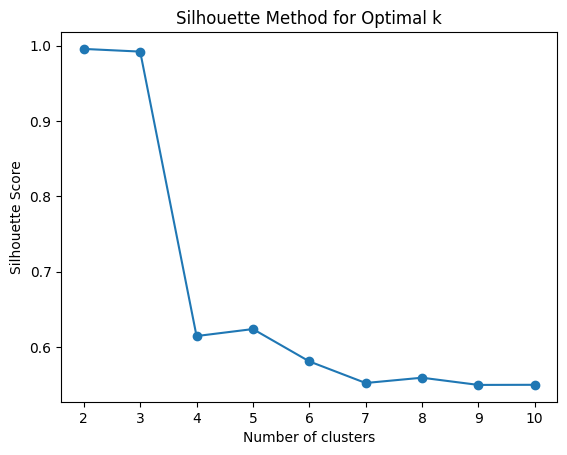

In [26]:
plt.plot(range(2, 11), coefficients, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16836\1767324486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


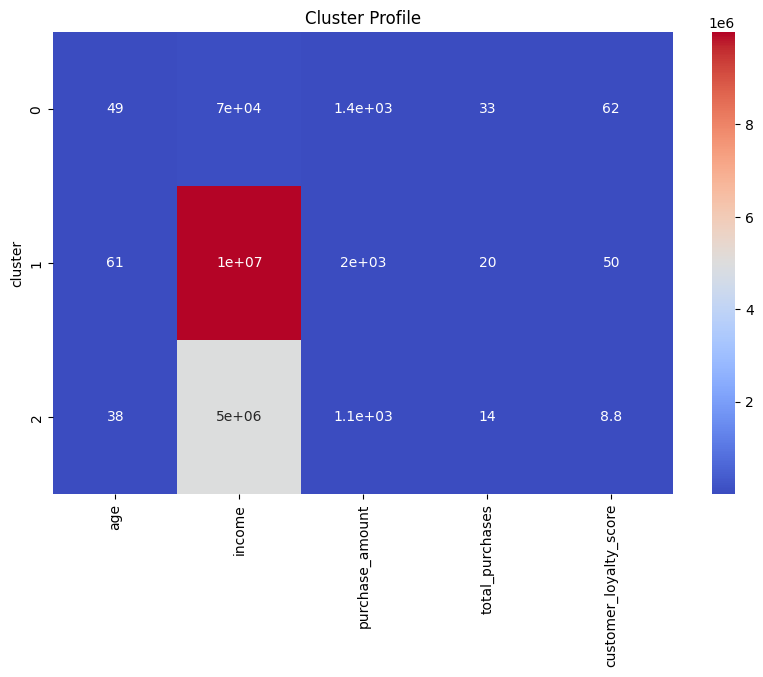

In [27]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Now group by 'cluster' and calculate the mean
cluster_profile = df.groupby('cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm')
plt.title('Cluster Profile')
plt.show()